In [4]:
import scipy.stats as st
#from scipy.stats import norm
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

La fonction norm(loc, scale) est la distribution de probabilité normale de moyenne loc et écart type scale.

Pour calculer la probabilité qu’une distribution normale soit inférieure à une valeur x on utilise la fonction cdf(x).

In [5]:
st.norm(loc = 5.3, scale = 1).cdf(4.5)

0.21185539858339675

On visualise la distribution normale avec la moyenne et écart type donnés.

KeyError: 'y'

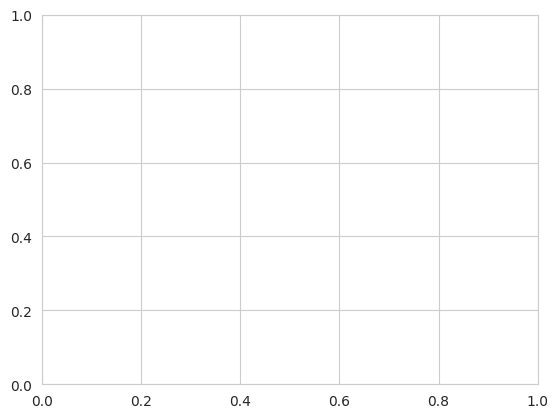

In [7]:
data = np.arange(1,10,0.01)
pdf = st.norm.pdf(data, loc = 5.3, scale = 1)
  
sb.set_style('whitegrid')
sb.lineplot(data, pdf , color = 'black')
plt.xlabel('x')
plt.ylabel('Densité de probabilité');

La probabilité que *X* soit inférieure à 6 est

In [4]:
st.norm(loc = 4.5, scale = 1.5).cdf(6)

0.8413447460685429

La probabilité que *X* soit supérieure à 2 est égale à 1 moins la probabilité que *X* soit inférieure à 2, donc

In [6]:
1 - st.norm(loc = 4.5, scale = 1.5).cdf(2)

0.9522096477271853

La probabilité que *X* soit comprise entre 1,75 et 5,75 est égale à la probabilité que *X* soit inférieure à 5,75 moins la probabilité que *X* soit inférieure à 1,75, donc

In [8]:
st.norm(loc = 4.5, scale = 1.5).cdf(5.75) - st.norm(loc = 4.5, scale = 1.5).cdf(1.75)

0.7642951114515396

In [5]:
round(st.norm(loc = 4.5, scale = 1.5).cdf(6), 3)

0.841

In [7]:
round(1 - st.norm(loc = 4.5, scale = 1.5).cdf(2), 3)

0.952

In [9]:
round(st.norm(loc = 4.5, scale = 1.5).cdf(5.75) - st.norm(loc = 4.5, scale = 1.5).cdf(1.75), 3)

0.764

La valeur $\beta$ telle que $P(X \leq \beta)$ = 0,35 est obtenue ainsi,

In [10]:
st.norm.ppf(0.35, loc = 4.5, scale = 1.5)

3.9220193003886483

La valeur $\alpha$ telle que $P(X \geq \alpha)$ = 0,40 est égale à la valeur $\beta$ telle que $P(X \leq \beta)$ = 0,60, donc

In [12]:
st.norm.ppf(0.6, loc = 4.5, scale = 1.5)

4.880020654703699

In [11]:
round(st.norm.ppf(0.35, loc = 4.5, scale = 1.5), 3)

3.922

In [13]:
round(st.norm.ppf(0.6, loc = 4.5, scale = 1.5), 3)

4.88

L’intervalle centré en la moyenne (4,5) d’aire 0,55 est obtenu de la façon suivante,

In [14]:
st.norm.interval(alpha = 0.55, loc = 4.5, scale = 1.5)

(3.366877460459296, 5.633122539540704)

On vérifie que l’intervalle est bien centré en 4,5.

In [15]:
4.5 - st.norm.interval(alpha = 0.55, loc = 4.5, scale = 1.5)[0]

1.1331225395407039

In [16]:
st.norm.interval(alpha = 0.55, loc = 4.5, scale = 1.5)[1] - 4.5

1.1331225395407039

Les deux valeurs sont égales, donc l’intervalle est bien centré en 4,5.

In [17]:
round(st.norm.interval(alpha = 0.55, loc = 4.5, scale = 1.5)[0], 3)

3.367

In [18]:
round(st.norm.interval(alpha = 0.55, loc = 4.5, scale = 1.5)[1], 3)

5.633

In [ ]:
round(st.norm(loc = 550, scale = 15.73).cdf(509.5), 3)